# 군집

- 특징
  - 종속변수 (속성, label, y)가 없는 비지도학습
  - 유사성 기반 유사 개체끼리 묶기
  - 새로운 데이터를 예측하는 것이 아니라 전체적인 데이터 구조를 파악하는데 이용
  - 분석한 결과에 대한 검증이 어려움(검증할 수 있는 방법이 없음)
  - ex) 고객 DB => 알고리즘 적용 => 패턴 추출 => 군집 형성

# K-means 군집화

대표적인 군집 알고리즘

비지도학습이기 때문에 레이블이 없는 데이터들만으로도 작동

데이터를 k개의 클러스터(cluster, 무리)로 분류

우리가 분류하고 싶은 클래스의 개수가 k 이다.

# K-Means 동작 과정
1. 내가 가진 데이터(샘플)들을 뿌리고
2. k개의 중심점(centroid)위치를 랜덤으로 설정
3. 각각의 중심점을 기준으로 모든 데이터가 얼마나 떨어져 있는지 파악(계산)
4. 각각의 데이터와 가장 가까운 중심점에 포인터를 할당 (각 데이터의 클러스터를 정해줌)
5. 각 중심점에 할당된 모든 데이터 포인터를 기준으로 공간 분리
6. 분리된 공간에 속해있는 포인터들의 위치의 평균 계산
7. 평균을 기준으로 중심점을 이동(재조정)
8. 3 - 4 - 5 - 6 - 7을 반복 (중심점 이동이 더 이상 없을 때까지)
9. 중심점 이동이 없으면 알고리즘 종료

# 이미지분할 => 색상분할

물체 감지, 추적시스템에 사용할 수 있는 기술

이미지 자체를 컴퓨터가 해석을 하는 것이 아니고,

이미지 자체를 조금 더 의미가 있는 이미지로 변경하는 것이 목표

In [1]:
!pip install opencv-python==4.4.0.40

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 6.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
import cv2
import os
from sklearn.cluster import KMeans
from imageio import imread

In [4]:
# 이미지 파일 하나 구해주세요
img = imread('mokoko.png')
print(img) # BGR로 표현한 상태가 출력되었음

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


<ipython-input-4-d6d82c26f56e>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('mokoko.png')


# 색을 표현하는 방법 : RGB (red, greem, blue) : 이 세가지 색을 섞거나 빼서 원하는 색을 만드는 방식

각각의 색상 0 ~ 255 사이의 값으로 표현

값이 커지면 커질수록 해당하는 색상의 빛이 밝아짐

RGB(255, 255, 255) : 흰색

RGB(0, 0, 0) : 검정색

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
OpenCV에서는 BGR : RGB와 정 반대

빨간색 : RGB(255, 0, 0) / BGR(0, 0, 255)


In [6]:
# BGR => RGB로 convert !

convert_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(convert_img)

print(img.shape)
# (220, 229, 3) : 차원의 크기 : (높이, 너비, 컬러채널 개수)
#   컬러채널 : 빨강, 초록, 파랑 채널
#         각각의 픽셀에 RGB강도를 담은 Vector

(220, 229, 3)


In [7]:
import numpy as np

vec = img.reshape(-1, 3) # 행 하나당 열이 3개 되도록
vec = np.float32(vec) # 실수형으로 변환
vec

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# criteria : 반복에 대한 설정, 기준에 충족되는 순간 알고리즘 반복이 멈추도록 하는 옵션
# 반복을 멈추게 하는 종류 - 3가지
#   cv2.TERM_CRITERIA_EPS   : 특정 정확도에 이르게 되면 알고리즘을 중지
#   cv2.TERM_CRITERIA_MAX_ITER  : 특정 반복횟수가 지나면 알고리즘 중지
#   cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER  : 두 조건 중 하나라도 만족하면 알고리즘 중지

#   max iter : 최대 반복횟수를 지정하는 [정수]
#   epsilon : 요구되는 특정 정확도

K = 4           # cluster의 수 (색상 수)
attempts = 10   # 알고리즘의 실행 횟수
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# ret : 밀집도
# label : 어느 클러스터에 속하게 되는지
# center : 클러스터의 중심좌표

# data : 학습 데이터 행렬(np.float32 / 실수형인 자료형을 요구함)
# K : 군집의 개수 (cluster의 수)
# best Labels : 각 샘플의 군집번호 행렬 - None
# criteria : 종료 기준 (type, max count, epsilon) 튜플
# attempts : 초기 레이블로 반복하는 횟수
# flags : 초기 중앙 설정법
#       cv2.KMEANS_PP_CENTERS : 시간이 소요되지만, 정확도가 높음
#       cv2.KMEANS_RANDOM_CENTERS : 정확도는 떨어지지만, 시간 소요가 덜 함

center = np.uint8(center) # 군집화 결과를 이용해서 출력할 내용을 생성함
res = center[label.flatten()] # 중심점 좌표 받기 => 각 필셀마다 K개 군집 중심 색상 치환
result = res.reshape((img.shape)) # 원본 이미지와 동일한 형태로 바꿔줌
##################################################################################
K = 7
attempts = 10
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result1 = res.reshape((img.shape))
##################################################################################
K = 10
attempts = 10
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result2 = res.reshape((img.shape))

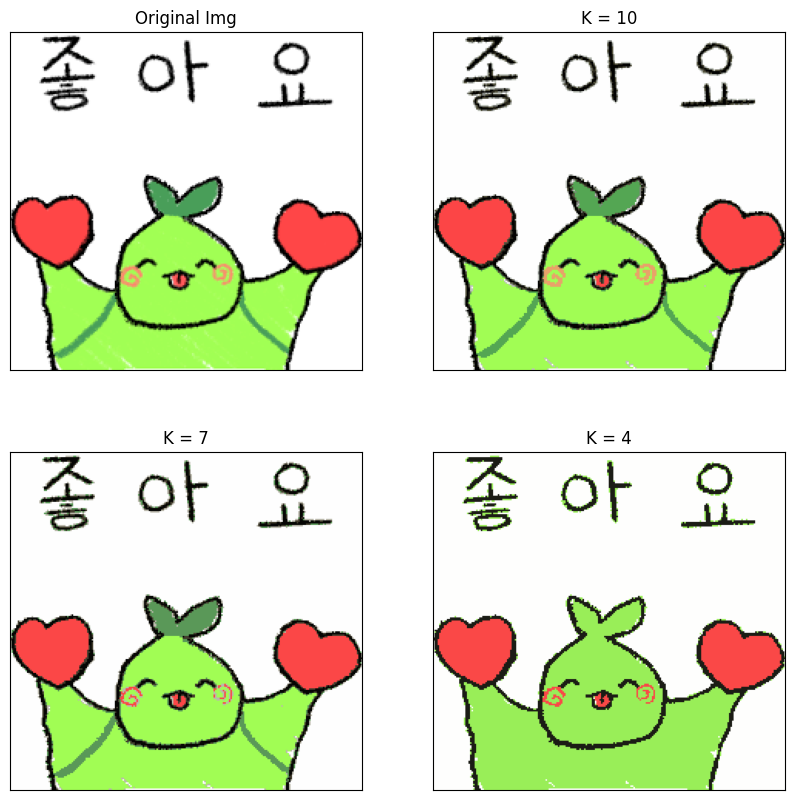

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Img'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(result2)
plt.title('K = 10'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(result1)
plt.title('K = 7'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(result)
plt.title('K = 4'), plt.xticks([]), plt.yticks([])

plt.show()